In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [18]:
df = pd.read_csv(r'C:\Users\17086\Downloads\Python_Diwali_Sales_Analysis-main\Python_Diwali_Sales_Analysis-main\Diwali Sales Data.csv', encoding='ISO-8859-1')

df.head(2)



,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN


# data cleaning

In [56]:
df.head(2)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0


In [21]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [23]:
# Drop Empty Columns: columns like Status and unnamed1 have no useful data


df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [25]:
# Handle Missing Values in Amount
df['Amount'] = df['Amount'].fillna(df['Amount'].mean())


In [26]:
df['Amount']

0        23952.0
1        23934.0
2        23924.0
3        23912.0
4        23877.0
          ...   
11246      370.0
11247      367.0
11248      213.0
11249      206.0
11250      188.0
Name: Amount, Length: 11251, dtype: float64

In [29]:
# lets change gender and marrital data type
df['Gender'] = df['Gender'].astype('category')
df['Marital_Status'] = df['Marital_Status'].astype('category')
df['Zone'] = df['Zone'].astype('category')
df['Occupation'] = df['Occupation'].astype('category')
df['Product_Category'] = df['Product_Category'].astype('category')


In [30]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [31]:
 # Check for duplicates
df.duplicated().sum()  

np.int64(8)

# Exploratory Data Analysis (EDA)

# Gender


In [55]:
# Exploratory Data Analysis (EDA) is a crucial step in data analysis. It helps us understand the structure, patterns, and relationships
# in our data before diving into more complex modeling. Here are the common steps to perform EDA:

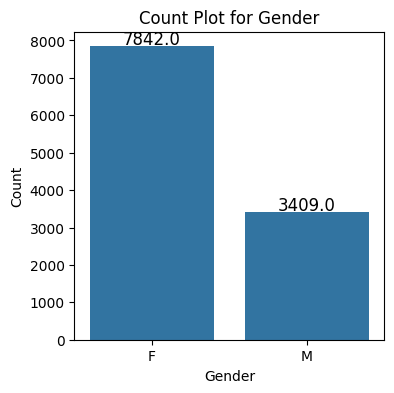

In [37]:
# Create a count plot for Gender
plt.figure(figsize=(4, 4)) 
ax = sns.countplot(data=df, x='Gender')

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',  # Value to be displayed
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Positioning the text
                ha='center', va='center',  # Alignment
                fontsize=12, color='black',  # Font properties
                xytext=(0, 5), textcoords='offset points')  # Adjust text position

# Title and labels
plt.title('Count Plot for Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Show the plot
plt.show()


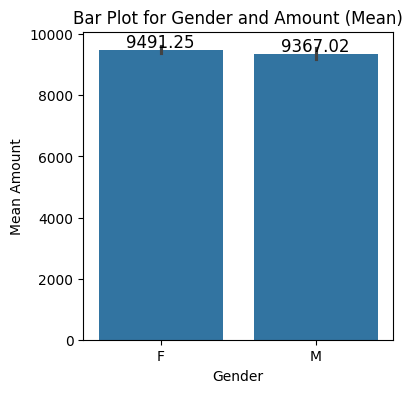

In [38]:
# bar plot for Gender and Amount 
plt.figure(figsize=(4, 4))  # Adjust the size of the plot if needed
ax = sns.barplot(data=df, x='Gender', y='Amount', estimator='mean')

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',  # Value to be displayed (mean Amount rounded to 2 decimal places)
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Positioning the text
                ha='center', va='center',  # Alignment
                fontsize=12, color='black',  # Font properties
                xytext=(0, 5), textcoords='offset points')  # Adjust text position

# Title and labels
plt.title('Bar Plot for Gender and Amount (Mean)')
plt.xlabel('Gender')
plt.ylabel('Mean Amount')

# Show the plot
plt.show()


In [42]:
gender_sales = df.groupby('Gender', observed=False)['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)


In [43]:
gender_sales

,Gender,Amount
0,F,7.443039e+07
1,M,3.193218e+07


<Axes: xlabel='Gender', ylabel='Amount'>

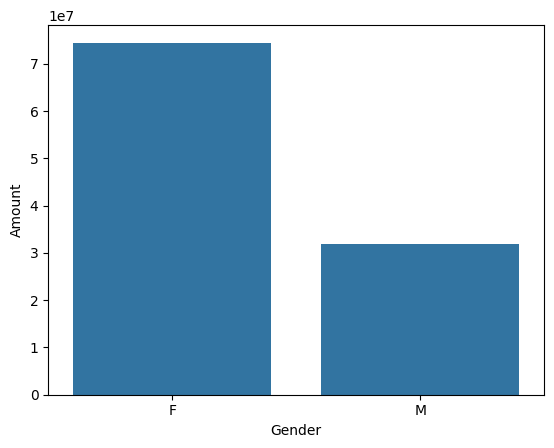

In [44]:
sns.barplot(x='Gender',y = 'Amount',data= gender_sales)

from th above graph we can see the most of the buyers are female and even the purchase power of female are greater than man

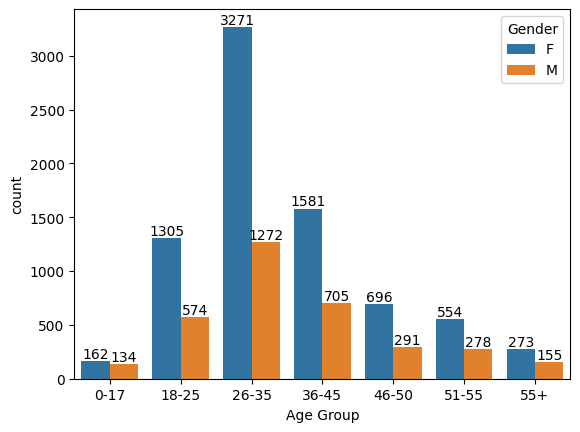

In [54]:
# now lets see the age group of genders who did the most purchase
sorted_age_groups = sorted(df['Age Group'].unique())
ax  = sns.countplot(x ='Age Group' ,data = df,hue = 'Gender', order=sorted_age_groups)

for bars in ax.containers:
    ax.bar_label(bars)

from the above graph we can see that age group of 36 - 45 females are the most buyer 

# state

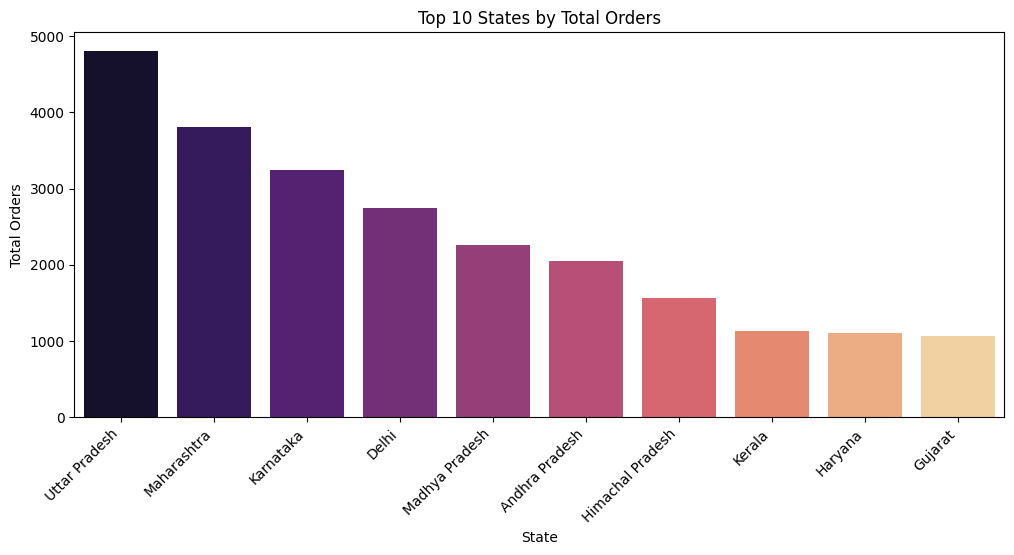

In [75]:
# Group by State, sum Orders, then sort in descending order (Top 10)
state_order = df.groupby('State', observed=False)['Orders'].sum().reset_index().sort_values(by='Orders', ascending=False).head(10)

# Set figure size
plt.figure(figsize=(12, 5))

# Create bar plot with explicit hue assignment
sns.barplot(x='State', y='Orders', data=state_order, hue='State', palette='magma', legend=False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Titles and labels
plt.title('Top 10 States by Total Orders')
plt.xlabel('State')
plt.ylabel('Total Orders')

# Show the plot
plt.show()


From the above graph we can see that  Uttar pradesh,Maharashtra and Karnataka are 
top in making orders

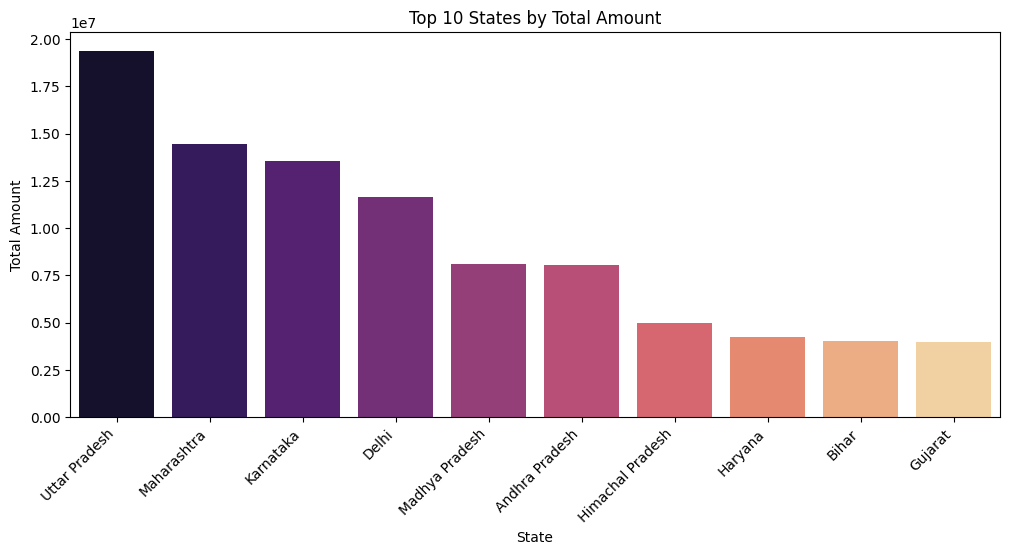

In [74]:
# Group by State, sum Amount, then sort in descending order (Top 10)

state_Amount = df.groupby('State', observed=False)['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False).head(10)

# Set figure sizeAmount
plt.figure(figsize=(12, 5))

# Create bar plot with explicit hue assignment
sns.barplot(x='State', y='Amount', data=state_Amount, hue='State', palette='magma', legend=False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Titles and labels
plt.title('Top 10 States by Total Amount')
plt.xlabel('State')
plt.ylabel('Total Amount')

# Show the plot
plt.show()


# Marital status

In [77]:
# df['Marital_Status']

0        0
1        1
2        1
3        0
4        1
        ..
11246    1
11247    0
11248    0
11249    0
11250    0
Name: Marital_Status, Length: 11251, dtype: category
Categories (2, int64): [0, 1]

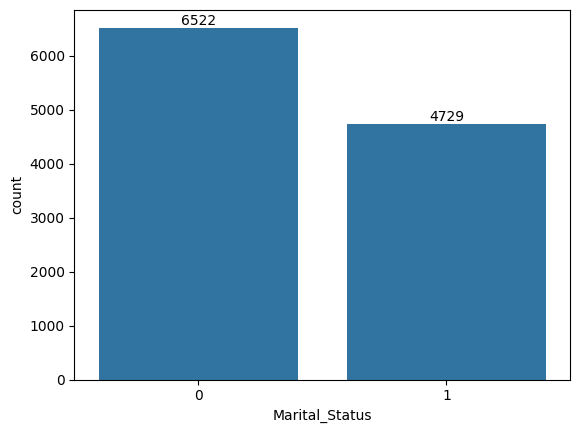

In [79]:
ax = sns.countplot(x = 'Marital_Status' ,data= df)
for bars in ax.containers:
    ax.bar_label(bars)

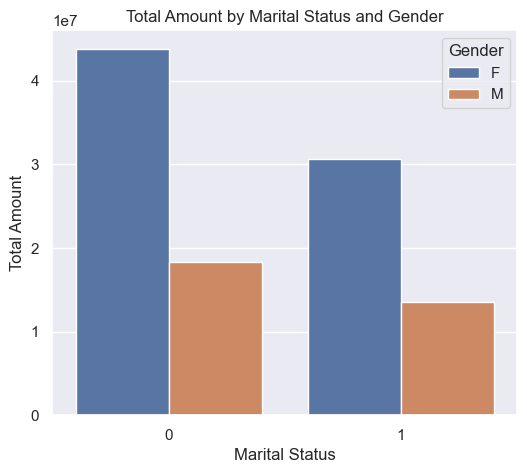

In [96]:
# Group by Marital_Status & Gender, sum Amount, then sort in descending order
Marital_Status_Amount = df.groupby(['Marital_Status', 'Gender'], observed=False, as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

# Set figure size
sns.set(rc={'figure.figsize': (6, 5)})

# Create a bar plot
sns.barplot(x='Marital_Status', y='Amount', hue='Gender', data=Marital_Status_Amount)

# Titles and labels
plt.title('Total Amount by Marital Status and Gender')
plt.xlabel('Marital Status')
plt.ylabel('Total Amount')

# Show the plot
plt.show()


from the above graph we can see that marrried women have done more shoping 

# Occupation

Text(0.5, 1.0, 'Count of Occupation')

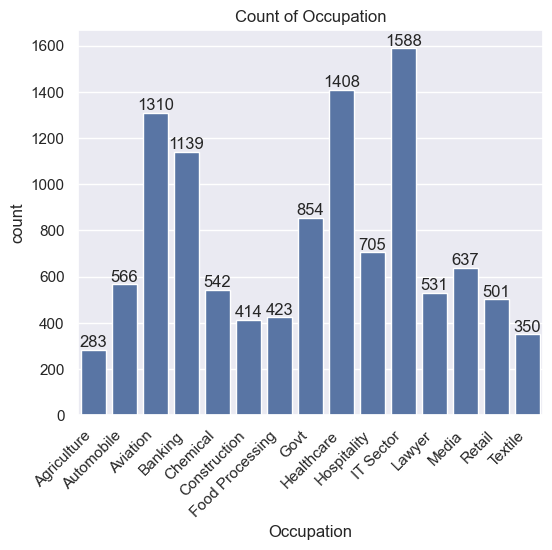

In [104]:
ax =sns.countplot(x='Occupation',data = df)

plt.xticks(rotation=45, ha='right')

for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Count of Occupation")


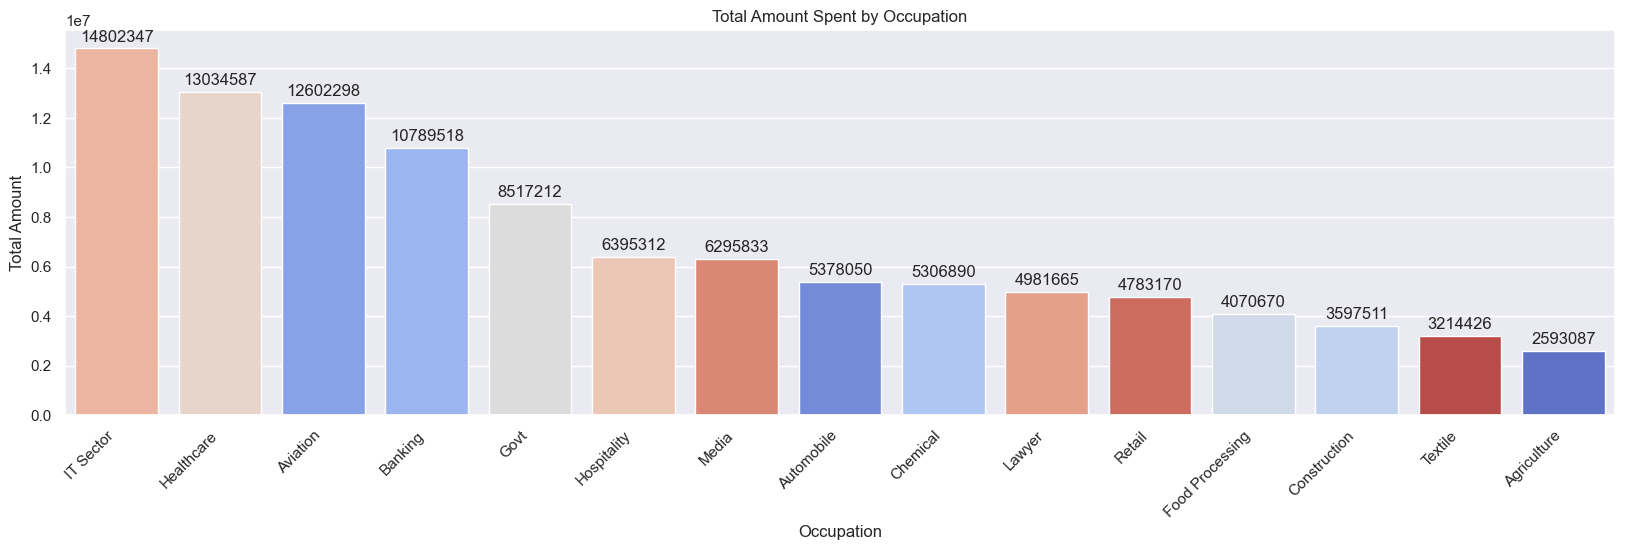

In [134]:
# Group by Occupation, sum Amount, then sort in descending order
Occupation_Amount = df.groupby('Occupation', observed=True, as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

# Set figure size
plt.figure(figsize=(20, 5))

# Create sorted barplot
ax = sns.barplot(
    x='Occupation', 
    y='Amount', 
    data=Occupation_Amount, 
    hue='Occupation',  # Assign hue to avoid warning
    palette='coolwarm', 
    order=Occupation_Amount['Occupation'],
    dodge=False  # Prevents bars from separating due to hue
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.0f', padding=3)  # No decimal places, adds padding above bars

# Title and labels
plt.title("Total Amount Spent by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Total Amount")

# Remove legend (not needed since colors are just for variation)
plt.legend([], [], frameon=False)

# Show the plot
plt.show()


In [123]:
Occupation_Amount

,Occupation,Amount
10,IT Sector,1.480235e+07
8,Healthcare,1.303459e+07
2,Aviation,1.260230e+07
3,Banking,1.078952e+07
7,Govt,8.517212e+06
9,Hospitality,6.395312e+06
12,Media,6.295833e+06
1,Automobile,5.378050e+06
4,Chemical,5.306890e+06
11,Lawyer,4.981665e+06


from the above graph we can see that most of the buyers are from IT ,Healthcare and Aviation sector

Text(0.5, 1.0, 'Count of Product_Category')

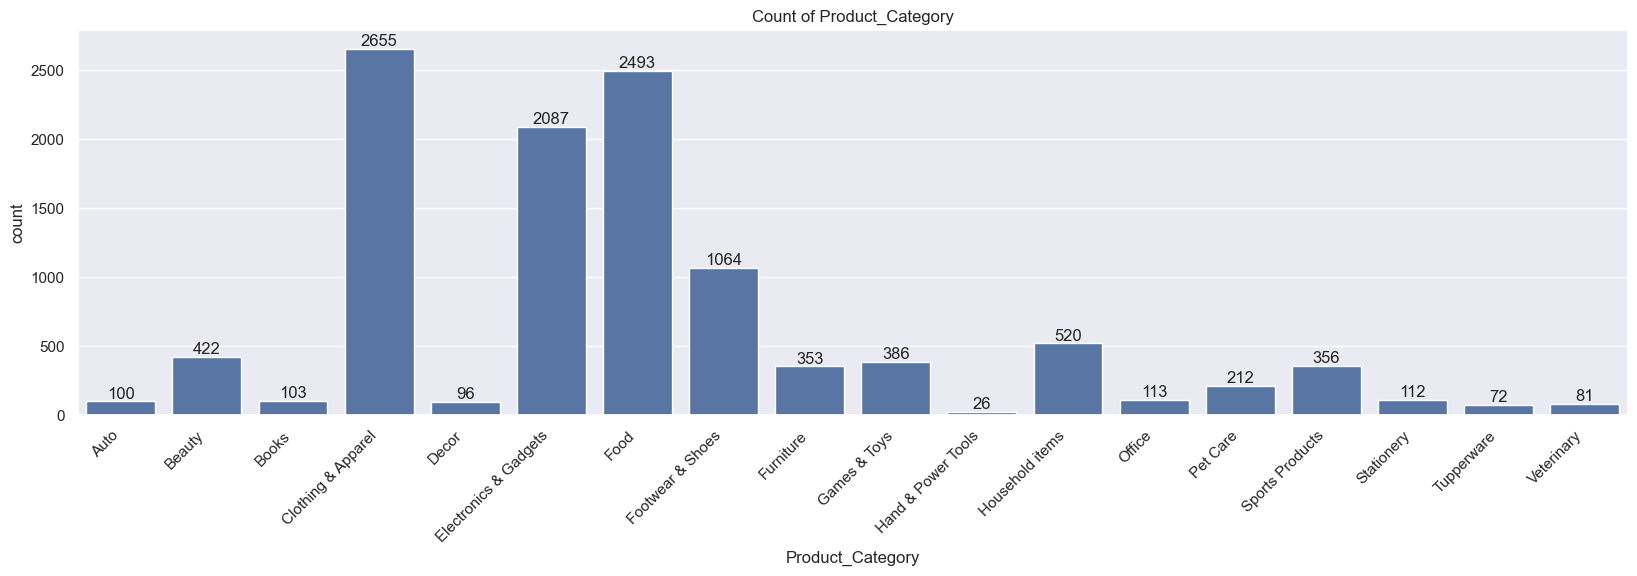

In [136]:
ax =sns.countplot(x='Product_Category',data = df)

plt.xticks(rotation=45, ha='right')

for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Count of Product_Category")


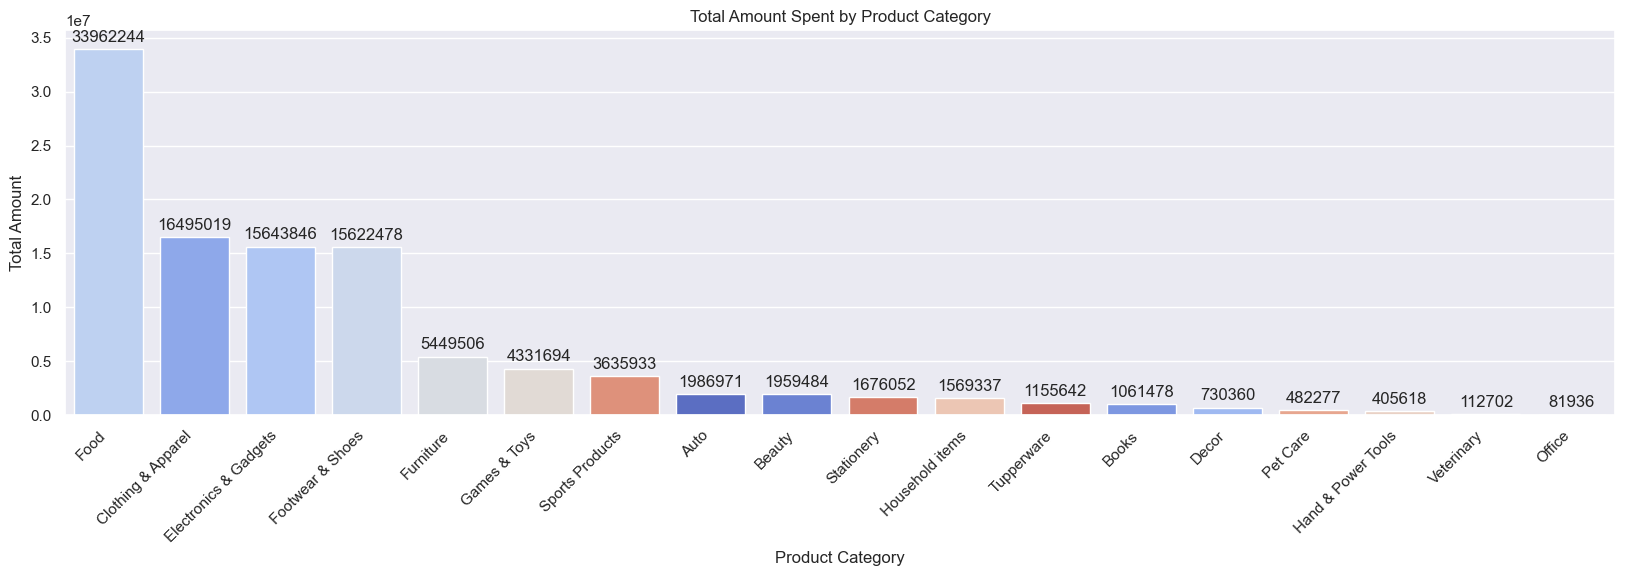

In [139]:


# Group by Product_Category, sum Amount, then sort in descending order
Product_Category_Amount = df.groupby('Product_Category', observed=True, as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

# Set figure size
plt.figure(figsize=(20, 5))

# Create sorted barplot with hue
ax = sns.barplot(
    x='Product_Category', 
    y='Amount', 
    data=Product_Category_Amount, 
    hue='Product_Category',  # Assign hue
    palette='coolwarm',  # Assign color palette
    order=Product_Category_Amount['Product_Category']  # Ensure sorting
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.0f', padding=3)  # No decimal places, adds padding above bars

# Title and labels
plt.title("Total Amount Spent by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Amount")

# Show the plot
plt.show()


we can see that most of the sold products are from Food,clothing & aparel and electronics & gadgets

Married women age between 26 -35 from UP ,Maharashtra and Karnataka working in IT ,Healthcare and Aviation sector
are more likely to buy products from food ,clothing,and electronics